**Predicting whether an applicant is capable of repaying a loan**

**Overview: The analysis explores loan application, payment history & underwriting factors to uncover factos that might carry predictive power in predicting loan repayment rate**

In [1]:
import pandas as pd
import numpy as np

In [2]:
from utils import *

In [3]:
# import sweetviz as sv
import autoviz
from autoviz.AutoViz_Class import AutoViz_Class

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# 1. load data 

In [5]:
loan = pd.read_csv(f'../data/loan.csv')

In [6]:
underwriting = pd.read_csv(f'../data/clarity_underwriting_variables.csv')
underwriting_ = underwriting[['clearfraudscore', 'underwritingid']]

In [7]:
payment = pd.read_csv(f'../data/payment.csv')

# 2. Initial Data Exploration

* Total 577426 unique application <br />
* 46044/5774126 application got originate --> 8% <br />
* 357588 application got clarified --> 62% <br />
* 51467 application got information of 1st payment --> 8.9% 
* 575432 application got loan amount --> 99.7%

In [8]:
# Check the shape
print(f'The dataset contains {loan.shape[0]} rows and {loan.shape[1]} columns.')

# Get column information
loan.info()

The dataset contains 577682 rows and 19 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577682 entries, 0 to 577681
Data columns (total 19 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   loanId                            577426 non-null  object 
 1   anon_ssn                          577682 non-null  object 
 2   payFrequency                      576409 non-null  object 
 3   apr                               573760 non-null  float64
 4   applicationDate                   577682 non-null  object 
 5   originated                        577682 non-null  bool   
 6   originatedDate                    46044 non-null   object 
 7   nPaidOff                          577658 non-null  float64
 8   approved                          577682 non-null  bool   
 9   isFunded                          577682 non-null  int64  
 10  loanStatus                        577291 non-null  object 
 11  loa

In [9]:
loan = loan.dropna(subset = ['loanId']).reset_index(drop = True) #drop null loanId

In [10]:
loan.describe()

,apr,nPaidOff,isFunded,loanAmount,originallyScheduledPaymentAmount,leadCost,hasCF
count,573760.000000,577402.000000,577426.000000,575432.000000,577426.000000,577426.000000,577426.000000
mean,553.080972,0.037885,0.067510,514.245084,1429.530707,7.854624,0.619279
std,110.046159,0.333402,0.250903,320.939929,924.724636,12.853011,0.485564
min,0.000000,0.000000,0.000000,0.000000,-816.710000,0.000000,0.000000
25%,490.000000,0.000000,0.000000,350.000000,1023.780000,3.000000,0.000000
50%,590.000000,0.000000,0.000000,500.000000,1245.260000,3.000000,1.000000
75%,601.000000,0.000000,0.000000,500.000000,1615.660000,6.000000,1.000000
max,705.590000,21.000000,1.000000,5000.000000,19963.630000,200.000000,1.000000


* 49750 loanId got underwriting information <br />
* 49615 got fraudscore <br />
* Fraud score range from 126 to 965

In [11]:
# Check the shape
print(f'The dataset contains {underwriting.shape[0]} rows and {underwriting.shape[1]} columns.')

# Get column information
underwriting.info()

The dataset contains 49752 rows and 54 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49752 entries, 0 to 49751
Data columns (total 54 columns):
 #   Column                                                                                               Non-Null Count  Dtype  
---  ------                                                                                               --------------  -----  
 0   .underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago                                  49750 non-null  float64
 1   .underwritingdataclarity.clearfraud.clearfraudinquiry.twentyfourhoursago                             49750 non-null  float64
 2   .underwritingdataclarity.clearfraud.clearfraudinquiry.oneminuteago                                   49750 non-null  float64
 3   .underwritingdataclarity.clearfraud.clearfraudinquiry.onehourago                                     49750 non-null  float64
 4   .underwritingdataclarity.clearfraud.clearfraudinquiry.nine

In [12]:
underwriting.describe()

,.underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.twentyfourhoursago,.underwritingdataclarity.clearfraud.clearfraudinquiry.oneminuteago,.underwritingdataclarity.clearfraud.clearfraudinquiry.onehourago,.underwritingdataclarity.clearfraud.clearfraudinquiry.ninetydaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.sevendaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.tenminutesago,.underwritingdataclarity.clearfraud.clearfraudinquiry.fifteendaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.threesixtyfivedaysago,.underwritingdataclarity.clearfraud.clearfraudindicator.totalnumberoffraudindicators,.underwritingdataclarity.clearfraud.clearfraudindicator.maxnumberofssnswithanybankaccount,.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchreasoncode,clearfraudscore
count,49750.000000,49750.000000,49750.000000,49750.000000,49750.000000,49750.000000,49750.000000,49750.000000,49750.000000,49735.000000,49735.000000,49720.000000,49615.000000
mean,7.313628,4.601990,2.343980,4.006874,10.554513,5.423799,3.292121,6.155578,20.302291,2.118327,7.202554,11.728842,683.769787
std,6.327122,3.302288,1.436345,2.697831,10.450845,4.110483,2.109667,4.952620,23.771239,1.254602,79.908530,14.116701,126.205372
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,122.000000
25%,3.000000,3.000000,1.000000,3.000000,4.000000,3.000000,2.000000,3.000000,6.000000,1.000000,1.000000,1.000000,592.000000
50%,5.000000,3.000000,3.000000,3.000000,7.000000,4.000000,3.000000,5.000000,12.000000,2.000000,1.000000,11.000000,691.000000
75%,9.000000,5.000000,3.000000,5.000000,13.000000,6.000000,4.000000,7.000000,25.000000,3.000000,2.000000,15.000000,783.000000
max,89.000000,60.000000,16.000000,42.000000,202.000000,64.000000,35.000000,83.000000,438.000000,8.000000,4056.000000,125.000000,965.000000


Principal, fee & paymentAmount got negative value? <br />

In [13]:
# Check the shape
print(f'The dataset contains {payment.shape[0]} rows and {payment.shape[1]} columns.')

# Get column information
payment.info()

The dataset contains 689364 rows and 9 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689364 entries, 0 to 689363
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   loanId             689364 non-null  object 
 1   installmentIndex   689364 non-null  int64  
 2   isCollection       689364 non-null  bool   
 3   paymentDate        689364 non-null  object 
 4   principal          689364 non-null  float64
 5   fees               689364 non-null  float64
 6   paymentAmount      689364 non-null  float64
 7   paymentStatus      525307 non-null  object 
 8   paymentReturnCode  31533 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(4)
memory usage: 42.7+ MB


In [14]:
payment.describe()

,installmentIndex,principal,fees,paymentAmount
count,689364.000000,689364.000000,689364.000000,689364.000000
mean,10.553222,45.557543,67.003994,112.680232
std,8.049530,81.724683,59.789510,105.783710
min,1.000000,-303.370000,-42.560000,-337.700000
25%,5.000000,13.180000,28.820000,56.810000
50%,9.000000,27.610000,51.300000,86.340000
75%,14.000000,53.380000,86.440000,135.090000
max,105.000000,4000.000000,1257.710000,4063.600000


# 3. Data cleaning & Preprocessing

1. Categorize loan status into bigger groups
2. Fill missing values
3. Calculate interest rate by payment  & yearly interest rate

**Group loan status into bigger group** <br />
Active loan: Loan is still <br />
repayment completed: <br />
Loan in default <br />
Pending: <br />
* 93% application withdrawn or canceled <br />
* 2% complete repayment
* 3.1% loan goes to default

In [15]:
#fill missing value
loan['nPaidOff'] = loan['nPaidOff'].fillna(0)

## calculate interest rate by payment & yearly interest rate

In [16]:
payment.head(2)

,loanId,installmentIndex,isCollection,paymentDate,principal,fees,paymentAmount,paymentStatus,paymentReturnCode
0,LL-I-00000021,1,False,2014-12-19T05:00:00,22.33,147.28,169.61,Checked,NaN
1,LL-I-00000021,2,False,2015-01-02T05:00:00,26.44,143.17,169.61,Checked,NaN


In [17]:
installment = payment[payment['isCollection']==False]
installment = installment.groupby(['loanId'])['installmentIndex'].max().reset_index(name = 'no_installment')

In [18]:
payment_amount = payment.groupby(['loanId']).agg({'principal':sum, 'paymentAmount': sum}).reset_index()

In [19]:
payment_agg = payment_amount.merge(installment, on = 'loanId', how = 'left')

In [20]:
payment_agg['interestrate_per_payment'] = payment_agg['paymentAmount']/(payment_agg['principal']* payment_agg['no_installment'])

In [21]:
payment_agg.head()

,loanId,principal,paymentAmount,no_installment,interestrate_per_payment
0,LL-I-00000021,800.01,2035.22,12,0.211999
1,LL-I-00000231,1502.47,3399.02,20,0.113114
2,LL-I-00000238,1265.58,2732.66,16,0.134951
3,LL-I-00000308,391.72,1354.98,22,0.157230
4,LL-I-00000355,1000.00,2451.52,23,0.106588


## Process loan status - target variables
Consider using loan status combine with default loanId from payment dataset to categorize loan repayment status

In [22]:
is_collection = set(payment[payment['isCollection']==True]['loanId']) #2434

In [23]:
loan['is_collection'] = np.where(loan['loanId'].isin(is_collection), 1,0)

In [24]:
loan['categorize_status'] = loan.apply(lambda x: status_categorize(x['is_collection'], x['loanStatus']), axis = 1)

In [25]:
loan['categorize_status'].value_counts(normalize = True)

categorize_status
withdrawl_or_cancel    0.931002
loan_in_default        0.031304
repayment_completed    0.019838
active_loan            0.014064
pending                0.003557
other                  0.000234
Name: proportion, dtype: float64

In [26]:
loan_under = loan.merge(underwriting_, left_on = 'clarityFraudId', right_on = 'underwritingid', how = 'left')
loan_under_payment = loan_under.merge(payment_agg[['interestrate_per_payment', 'loanId', 'no_installment']], on = 'loanId', how = 'left')

In [27]:
#fill missing value
loan_under_payment['no_installment'] = loan_under_payment['no_installment'].fillna(1) 

In [28]:
loan_under_payment.to_parquet(f'../intermediate/data_modelling.parquet')

# 3. Deeper insight & Hypothesis testing

The problem-set turns to be predicting the categorize_status of loan application. This part concentrates on analyzes the variables/features probably brings predictive power to predict loan status. <br />
From now on we only keep analyze loan with status *'withdrawl_or_cancel'* or *'loan_in_default'* or *'repayment_completed'*
* Relationship between variables
* Uncover correlations 
* Visualize data trends

## Version 1: 

Most of loan will be withdrawn or cancel --> severly imbalanced label

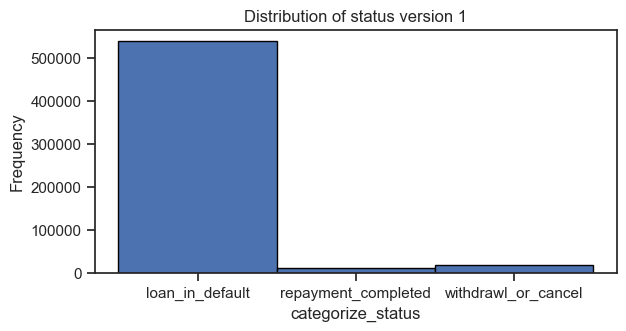

In [29]:
df_1 = loan_under_payment[loan_under_payment['categorize_status'].isin(['withdrawl_or_cancel', 'loan_in_default', 'repayment_completed'])]
plt.figure(figsize=(6, 3))
labels = df_1['categorize_status']
plt.hist(labels, bins=np.arange(len(np.unique(labels)) + 1) - 0.5, edgecolor='black', align='mid')
plt.xticks(np.arange(len(np.unique(labels))), np.unique(labels))
plt.xlabel('categorize_status')
plt.ylabel('Frequency')
plt.title('Distribution of status version 1')
plt.show()

* No Irregular frequency loan goes to default. Also application accepts irregular frequency tend to withdrawl/cancel application later. 

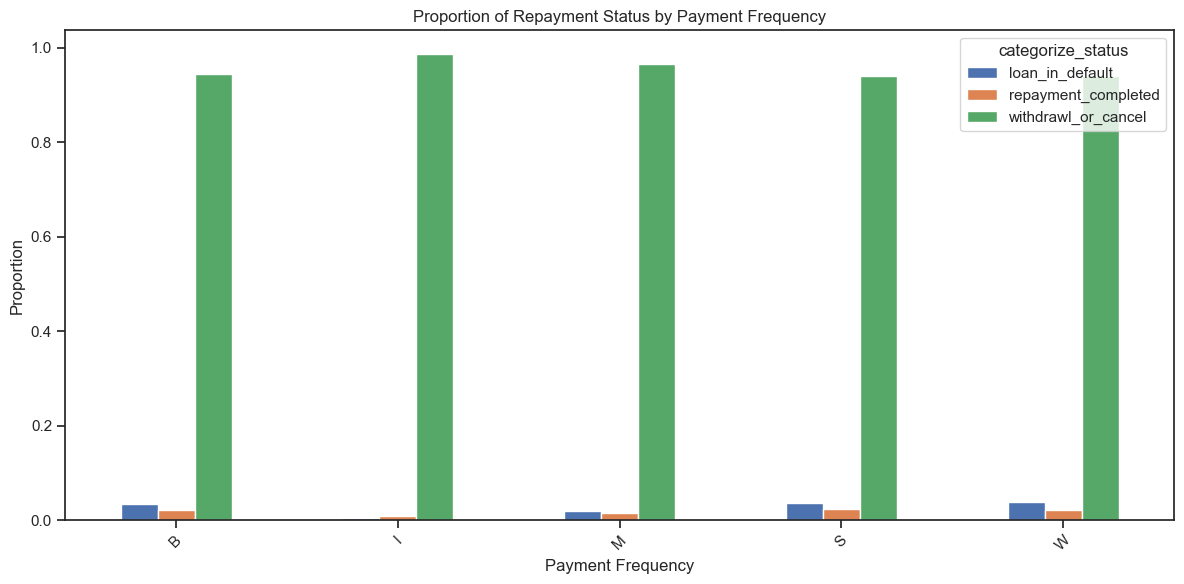

In [30]:
proportion_df = df_1.groupby('payFrequency')['categorize_status'].value_counts(normalize=True).unstack()
proportion_df.plot(kind='bar', stacked=False, figsize=(12, 6))
plt.title('Proportion of Repayment Status by Payment Frequency')
plt.xlabel('Payment Frequency')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

State "MD" ,"AZ", "CT", 'WA", "WI" tend to have higher probability of repaying 

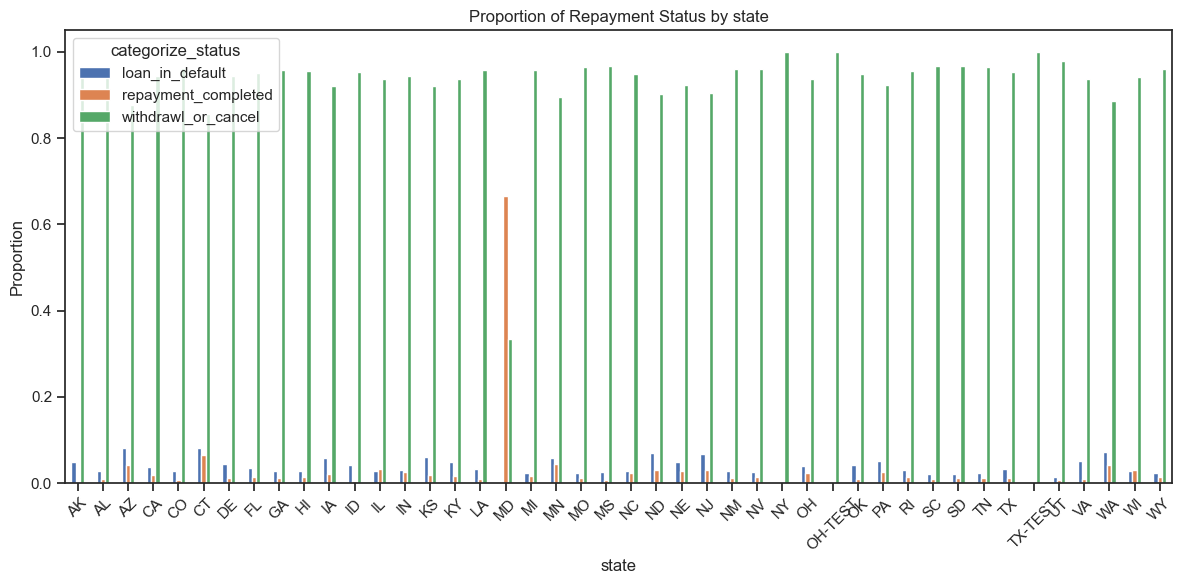

In [31]:
proportion_df = df_1.groupby('state')['categorize_status'].value_counts(normalize=True).unstack()
# Plot as a grouped bar chart
proportion_df.plot(kind='bar', stacked=False, figsize=(12, 6))
plt.title('Proportion of Repayment Status by state')
plt.xlabel('state')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Lead generated via express, lionpay, , rc_returning tend to have high probability of completing repayment

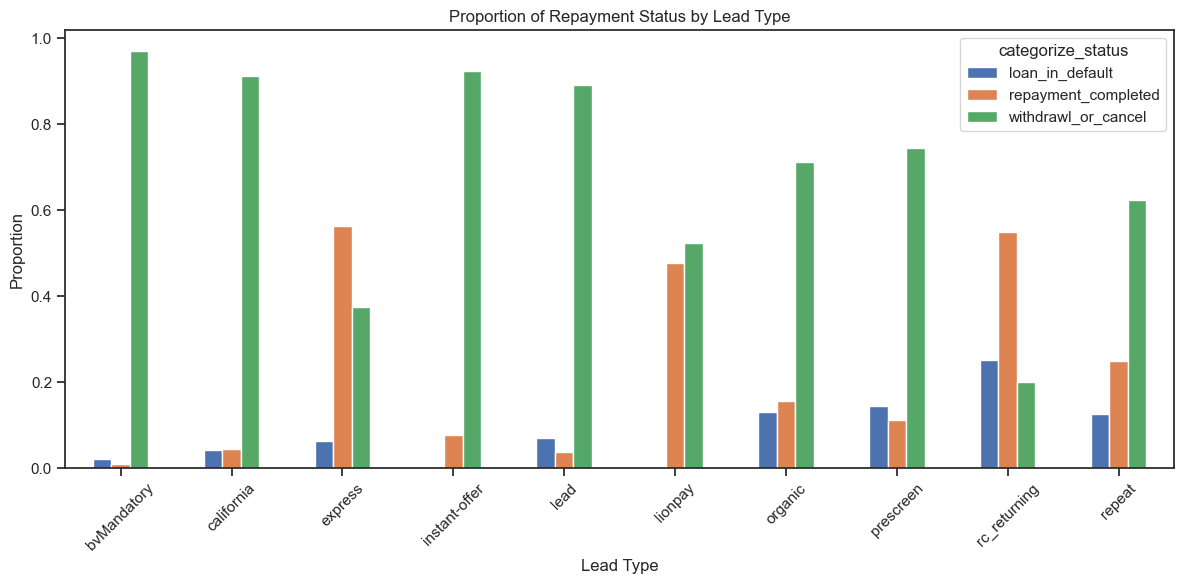

In [32]:
proportion_df = df_1.groupby('leadType')['categorize_status'].value_counts(normalize=True).unstack()
# Plot as a grouped bar chart
proportion_df.plot(kind='bar', stacked=False, figsize=(12, 6))
plt.title('Proportion of Repayment Status by Lead Type')
plt.xlabel('Lead Type')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

APR & loan amount might affect the repayment status

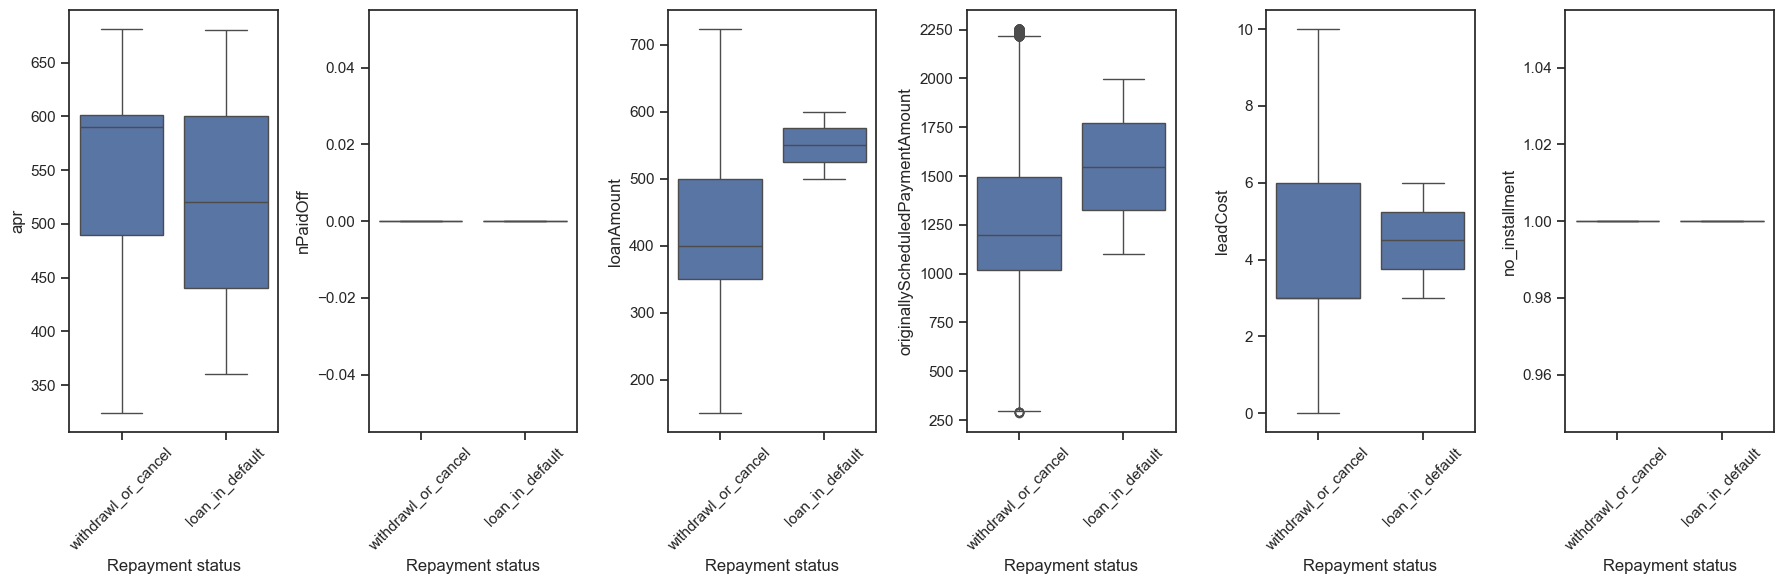

In [33]:
continuous_vars = ['apr', 'nPaidOff','loanAmount', 'originallyScheduledPaymentAmount','leadCost', 'no_installment']

# Remove outliers for each continuous variable
df_cleaned = df_1.copy()
for var in continuous_vars:
    df_cleaned = remove_outliers(df_cleaned, var)

# Plot boxplots for multiple continuous variables
fig, axes = plt.subplots(1, len(continuous_vars), figsize=(18, 6))

for i, var in enumerate(continuous_vars):
    sns.boxplot(data=df_cleaned, x='categorize_status', y=var, ax=axes[i])
    # axes[i].set_title(f'{var} Distribution by Repayment status (Outliers Removed)')
    axes[i].set_xlabel('Repayment status')
    axes[i].set_ylabel(var)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

originallyScheduledPaymentAmount & loanAmount are highly correlated

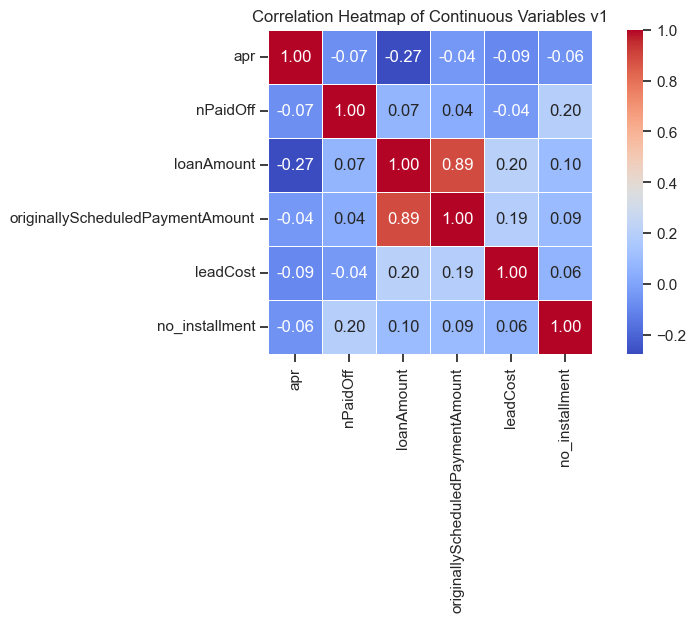

In [34]:
# Calculate the correlation matrix
correlation_matrix = df_1[continuous_vars].corr()

# Set the size of the plot
plt.figure(figsize=(8, 4))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=0.5)

# Add title and labels
plt.title('Correlation Heatmap of Continuous Variables v1')
plt.show()

## Version 2

In [35]:
loan_under_payment[(loan_under_payment['originated']==True)]['categorize_status'].value_counts()

categorize_status
loan_in_default        18073
repayment_completed    11453
active_loan             8112
withdrawl_or_cancel     6316
pending                 2052
Name: count, dtype: int64

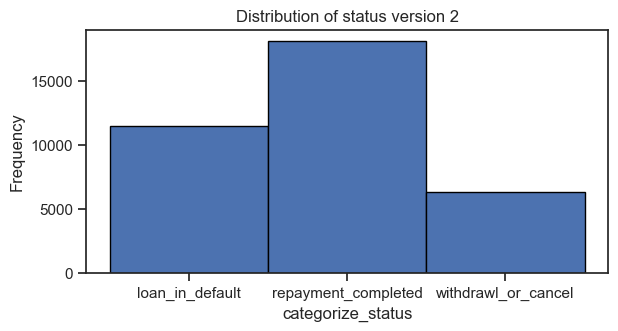

In [36]:
df_2 = loan_under_payment[(loan_under_payment['originated']==True) & 
                          (loan_under_payment['categorize_status'].isin(['withdrawl_or_cancel', 'repayment_completed','loan_in_default']))].reset_index(drop = True)
plt.figure(figsize=(6, 3))
labels = df_2['categorize_status']
plt.hist(labels, bins=np.arange(len(np.unique(labels)) + 1) - 0.5, edgecolor='black', align='mid')
plt.xticks(np.arange(len(np.unique(labels))), np.unique(labels))
plt.xlabel('categorize_status')
plt.ylabel('Frequency')
plt.title('Distribution of status version 2')
plt.show()

Irregular payment frequency tends to have high probability of finishing repayment

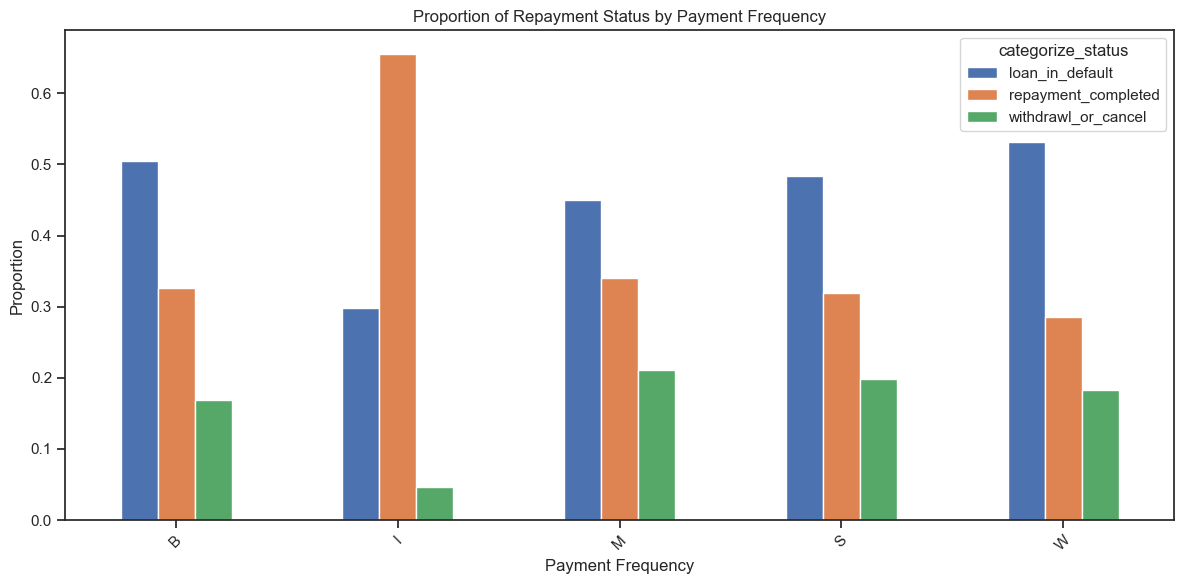

In [37]:
proportion_df = df_2.groupby('payFrequency')['categorize_status'].value_counts(normalize=True).unstack()
proportion_df.plot(kind='bar', stacked=False, figsize=(12, 6))
plt.title('Proportion of Repayment Status by Payment Frequency')
plt.xlabel('Payment Frequency')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

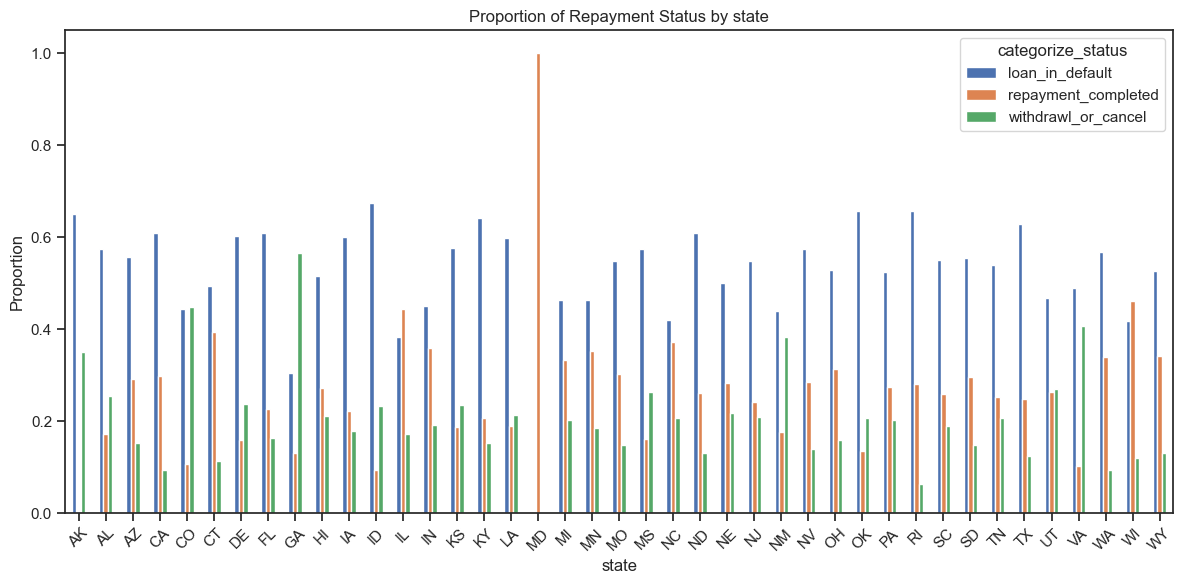

In [38]:
proportion_df = df_2.groupby('state')['categorize_status'].value_counts(normalize=True).unstack()
# Plot as a grouped bar chart
proportion_df.plot(kind='bar', stacked=False, figsize=(12, 6))
plt.title('Proportion of Repayment Status by state')
plt.xlabel('state')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

All lead generated via instant offer are repaid, via lion pay turn to be withdrawl or successfully repaid

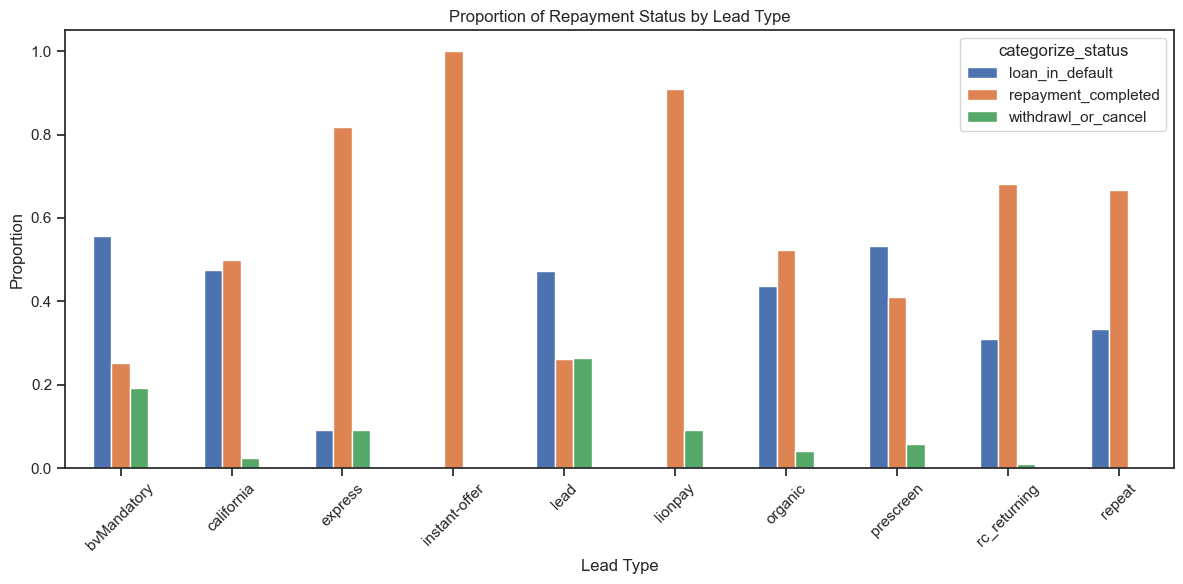

In [39]:
proportion_df = df_2.groupby('leadType')['categorize_status'].value_counts(normalize=True).unstack()
# Plot as a grouped bar chart
proportion_df.plot(kind='bar', stacked=False, figsize=(12, 6))
plt.title('Proportion of Repayment Status by Lead Type')
plt.xlabel('Lead Type')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

APR, interest_per_payment, clear fraud score highly influence the repayment status

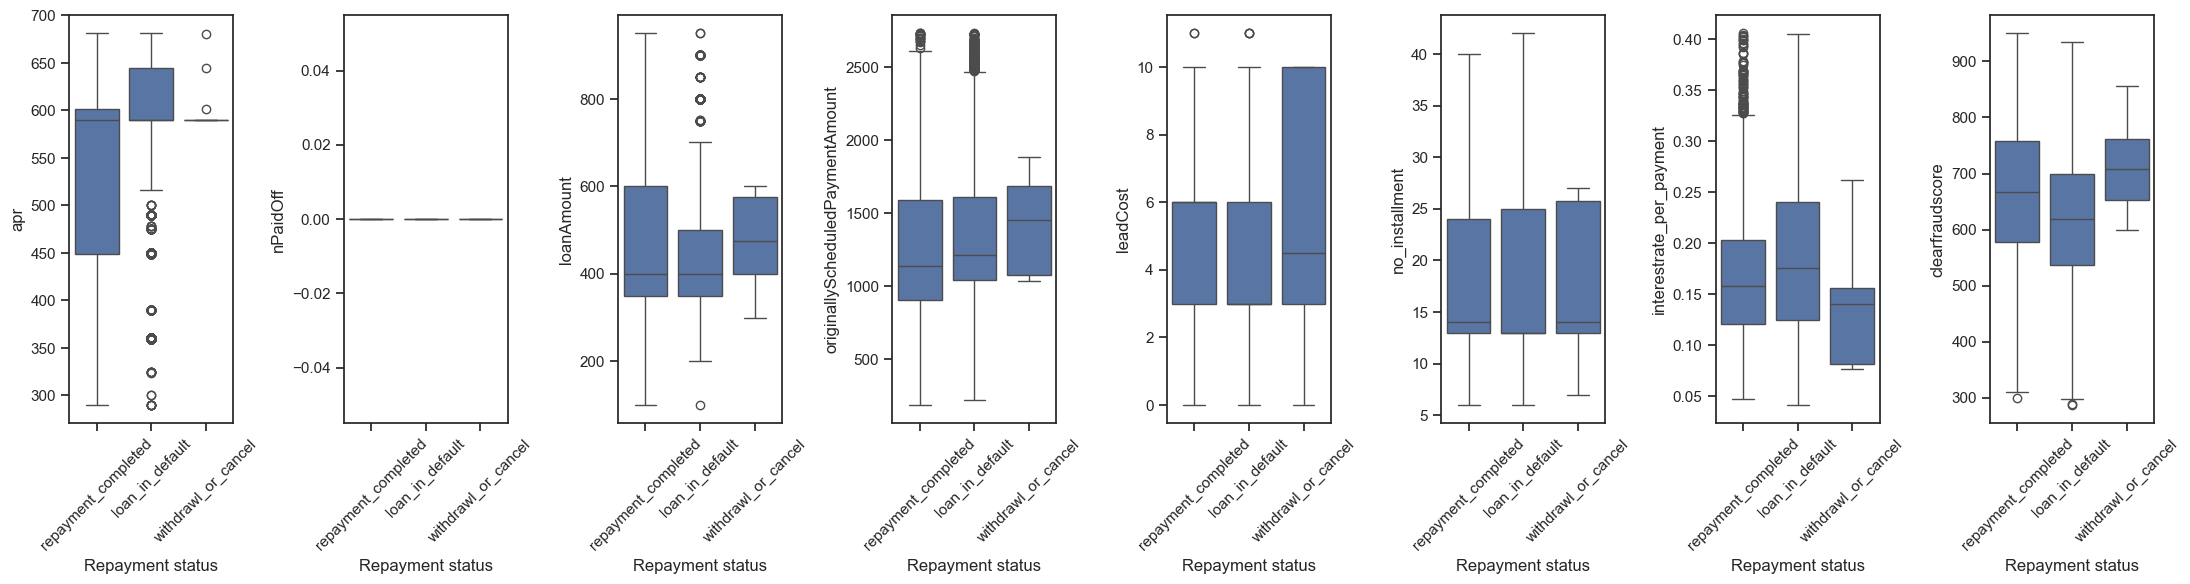

In [40]:
continuous_vars = ['apr', 'nPaidOff','loanAmount', 'originallyScheduledPaymentAmount','leadCost', 'no_installment', 'interestrate_per_payment',  'clearfraudscore']

# Remove outliers for each continuous variable
df_cleaned = df_2.copy()
for var in continuous_vars:
    df_cleaned = remove_outliers(df_cleaned, var)

# Plot boxplots for multiple continuous variables
fig, axes = plt.subplots(1, len(continuous_vars), figsize=(22, 6))

for i, var in enumerate(continuous_vars):
    sns.boxplot(data=df_cleaned, x='categorize_status', y=var, ax=axes[i])
    # axes[i].set_title(f'{var} Distribution by Repayment status (Outliers Removed)')
    axes[i].set_xlabel('Repayment status')
    axes[i].set_ylabel(var)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

* loanAmount & originallyScheduledPaymentAmount are highly correlated
* no_installment & interestrate_per_payment are highly correlated

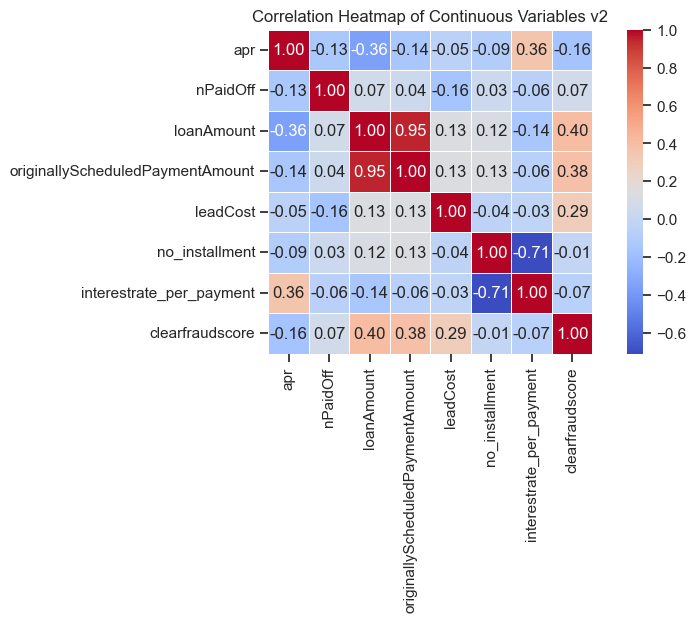

In [41]:
# Calculate the correlation matrix
correlation_matrix = df_2[continuous_vars].corr()

# Set the size of the plot
plt.figure(figsize=(8, 4))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=0.5)

# Add title and labels
plt.title('Correlation Heatmap of Continuous Variables v2')
plt.show()

## Version 3

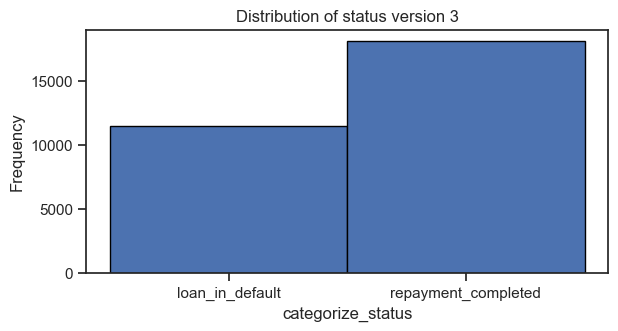

In [42]:
df_3 = loan_under_payment[loan_under_payment['categorize_status'].isin(['repayment_completed','loan_in_default'])
                          &(loan_under_payment['isFunded']==1)].reset_index(drop = True)
plt.figure(figsize=(6, 3))
labels = df_3['categorize_status']
plt.hist(labels, bins=np.arange(len(np.unique(labels)) + 1) - 0.5, edgecolor='black', align='mid')
plt.xticks(np.arange(len(np.unique(labels))), np.unique(labels))
plt.xlabel('categorize_status')
plt.ylabel('Frequency')
plt.title('Distribution of status version 3')
plt.show()

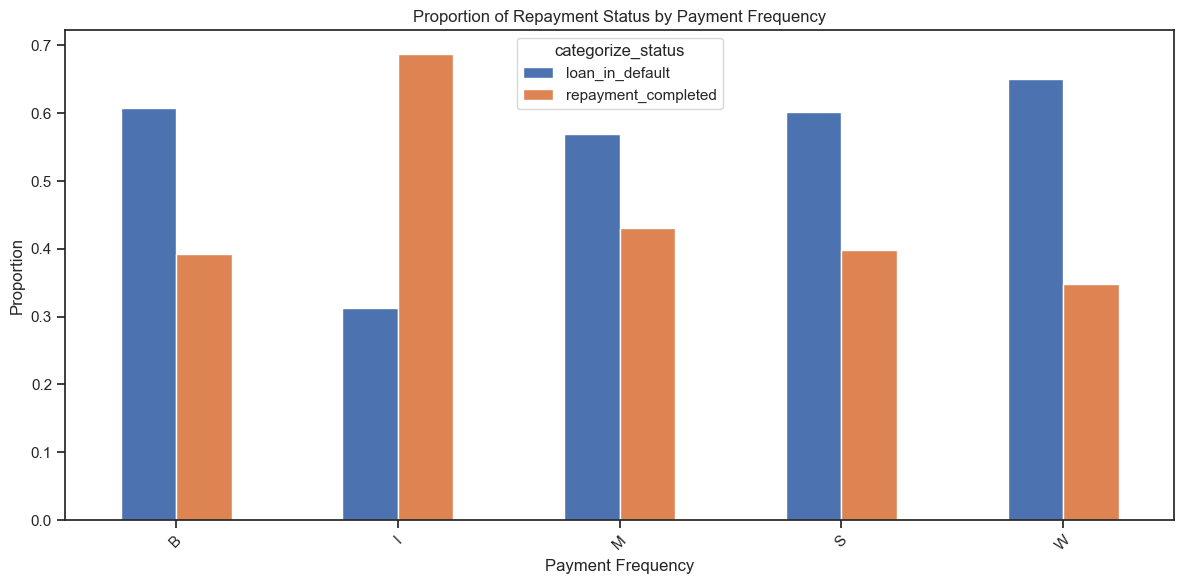

In [43]:
proportion_df = df_3.groupby('payFrequency')['categorize_status'].value_counts(normalize=True).unstack()
proportion_df.plot(kind='bar', stacked=False, figsize=(12, 6))
plt.title('Proportion of Repayment Status by Payment Frequency')
plt.xlabel('Payment Frequency')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

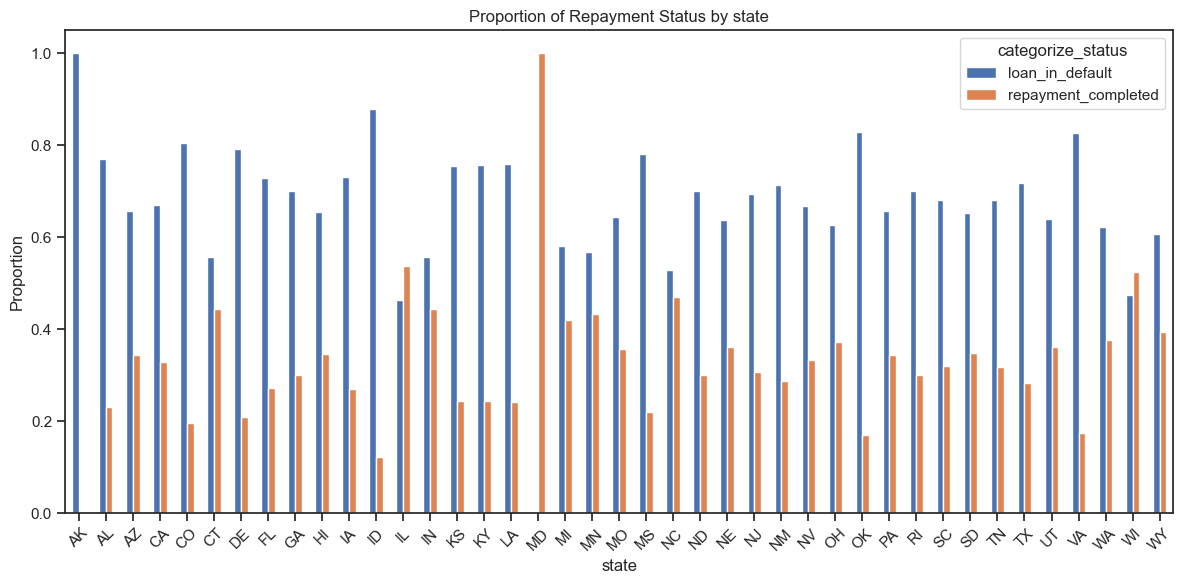

In [44]:
proportion_df = df_3.groupby('state')['categorize_status'].value_counts(normalize=True).unstack()
# Plot as a grouped bar chart
proportion_df.plot(kind='bar', stacked=False, figsize=(12, 6))
plt.title('Proportion of Repayment Status by state')
plt.xlabel('state')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

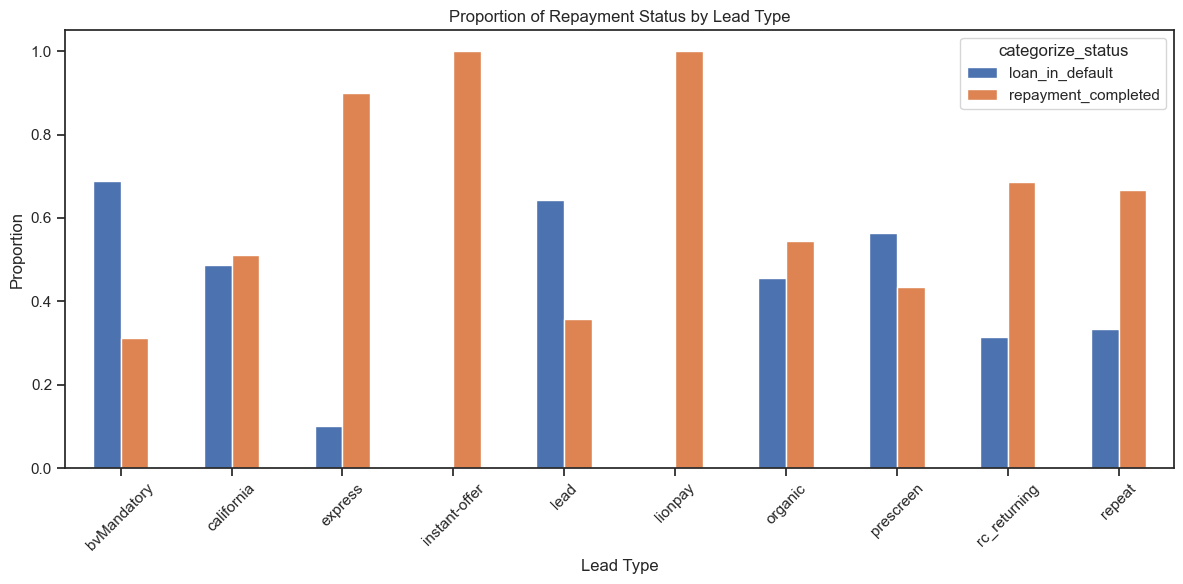

In [45]:
proportion_df = df_3.groupby('leadType')['categorize_status'].value_counts(normalize=True).unstack()
# Plot as a grouped bar chart
proportion_df.plot(kind='bar', stacked=False, figsize=(12, 6))
plt.title('Proportion of Repayment Status by Lead Type')
plt.xlabel('Lead Type')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

1st payment got "Returned" status, the lender will unlikely repay loan

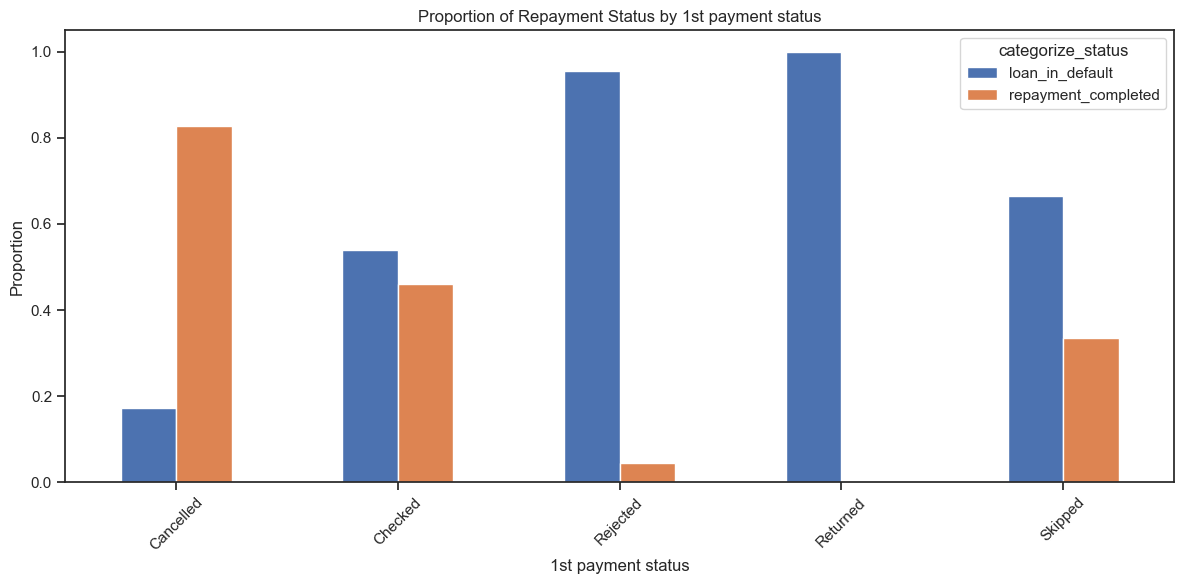

In [46]:
proportion_df = df_3.groupby('fpStatus')['categorize_status'].value_counts(normalize=True).unstack()
# Plot as a grouped bar chart
proportion_df.plot(kind='bar', stacked=False, figsize=(12, 6))
plt.title('Proportion of Repayment Status by 1st payment status')
plt.xlabel('1st payment status')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

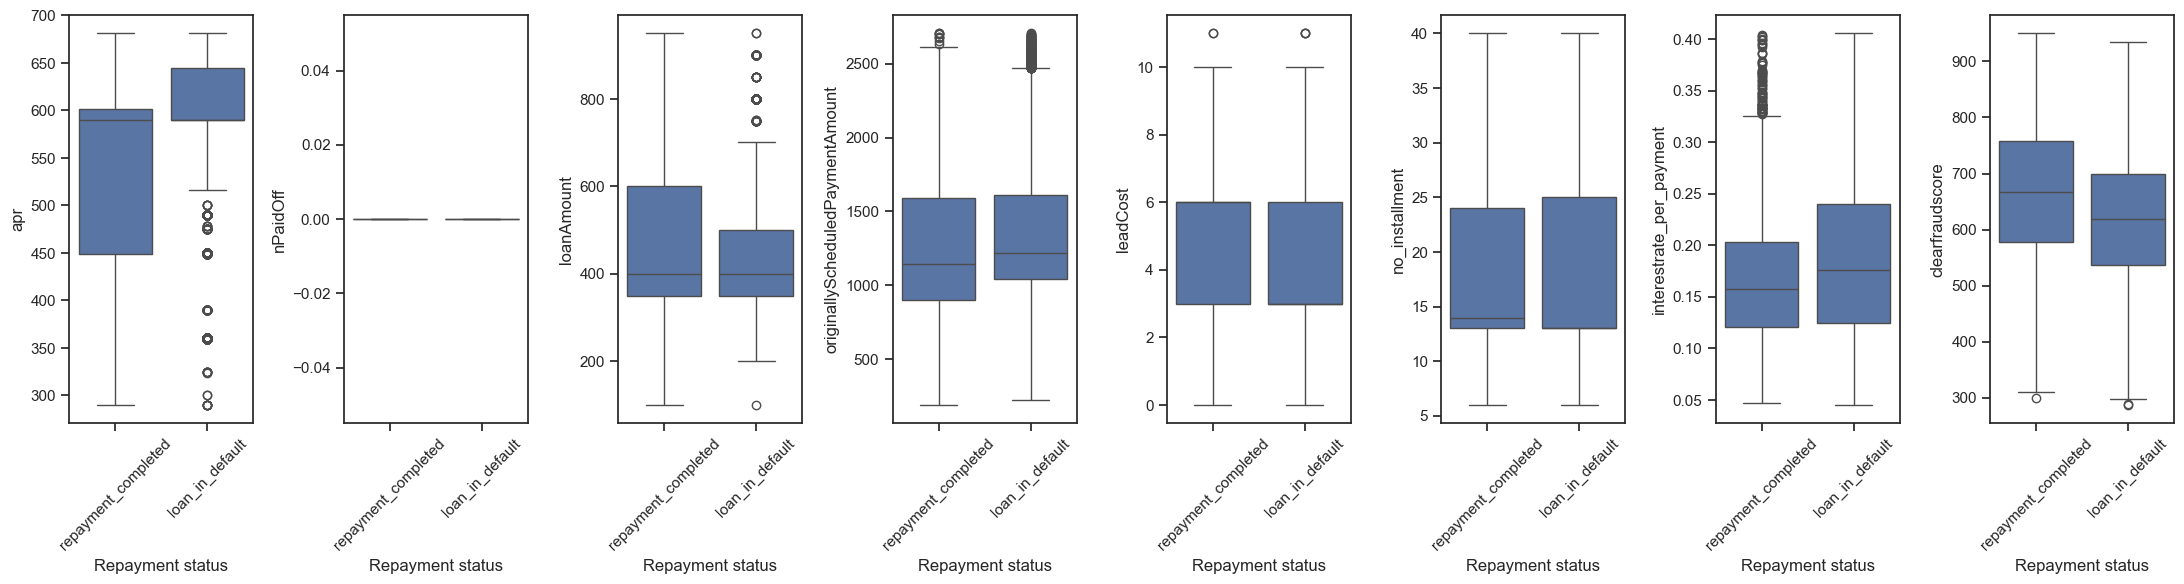

In [47]:
continuous_vars = ['apr', 'nPaidOff','loanAmount', 'originallyScheduledPaymentAmount','leadCost', 'no_installment', 'interestrate_per_payment',  'clearfraudscore']

# Remove outliers for each continuous variable
df_cleaned = df_3.copy()
for var in continuous_vars:
    df_cleaned = remove_outliers(df_cleaned, var)

# Plot boxplots for multiple continuous variables
fig, axes = plt.subplots(1, len(continuous_vars), figsize=(22, 6))

for i, var in enumerate(continuous_vars):
    sns.boxplot(data=df_cleaned, x='categorize_status', y=var, ax=axes[i])
    # axes[i].set_title(f'{var} Distribution by Repayment status (Outliers Removed)')
    axes[i].set_xlabel('Repayment status')
    axes[i].set_ylabel(var)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

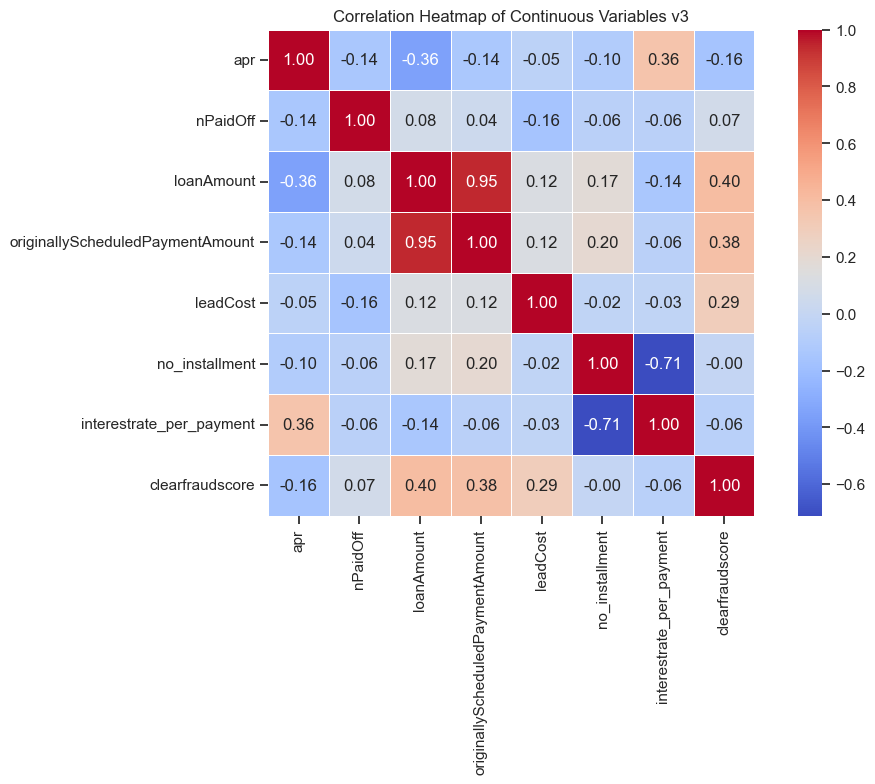

In [48]:
# Calculate the correlation matrix
correlation_matrix = df_3[continuous_vars].corr()

# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=0.5)

# Add title and labels
plt.title('Correlation Heatmap of Continuous Variables v3')
plt.show()

# 4. Key insights & Recommendations

* Irregular frequency has high chance of recognizing default or successfull repayment loan status
* Some states have higher rate of repayment: MD, IL etc
* Some leadtype have higher rate of repayment: Lionpay, instant-offer etc
* loanamount & originallyScheduledPaymentAmount are highly correlated --> should remove 1 of them from model
* no_installment & interestrate_per_payment are highly correlated --> consider remove 1 of them from model
* Higher apr loan might lead to higher chance of default repayment

# 5. Auto EDA

Some insights from auto EDA:
* loan amount & originallyScheduledPaymentAmount highly correlated <br />
* Pay frequency : Applicant not apply for irregular frequency type yet <br />
* applicant complete another loan before tends to repay loan this time <br />
* Loan finally goes to default tends to have higher apr & more installments

In [1]:
av=AutoViz_Class()
filename = ""
sep = ","
dft = av.AutoViz(
    filename,
    sep=",",
    depVar="categorize_status",
    dfte=df_1,
    header=0,
    verbose=0,
    lowess=False,
    chart_format="bokeh",
    max_rows_analyzed=1500000,
    max_cols_analyzed=30,
    save_plot_dir=f'../viz/version1/'
)

In [2]:
av=AutoViz_Class()
filename = ""
sep = ","
dft = av.AutoViz(
    filename,
    sep=",",
    depVar="categorize_status",
    dfte=df_2,
    header=0,
    verbose=0,
    lowess=False,
    chart_format="bokeh",
    max_rows_analyzed=1500000,
    max_cols_analyzed=30,
    save_plot_dir='../viz/version2'
)

In [ ]:
av=AutoViz_Class()
filename = ""
sep = ","
dft = av.AutoViz(
    filename,
    sep=",",
    depVar="categorize_status",
    dfte=df_3,
    header=0,
    verbose=0,
    lowess=False,
    chart_format="bokeh",
    max_rows_analyzed=1500000,
    max_cols_analyzed=30,
    save_plot_dir='../viz/version3'
)